In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\JANAK RAJ OJHA\AppData\Local\Temp\ipykernel_20500\513784750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


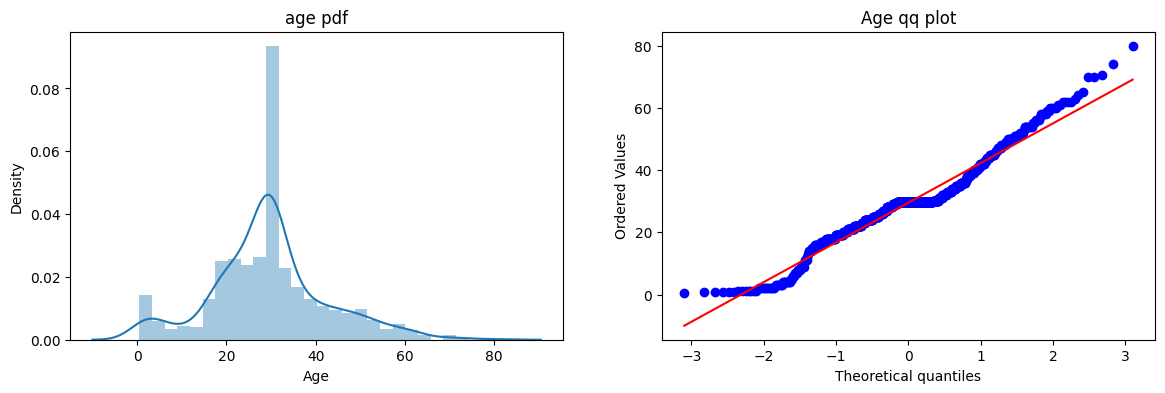

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age']) 
plt.title('age pdf')


plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age qq plot')

plt.show()

C:\Users\JANAK RAJ OJHA\AppData\Local\Temp\ipykernel_20500\4125381613.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'fare qq plot')

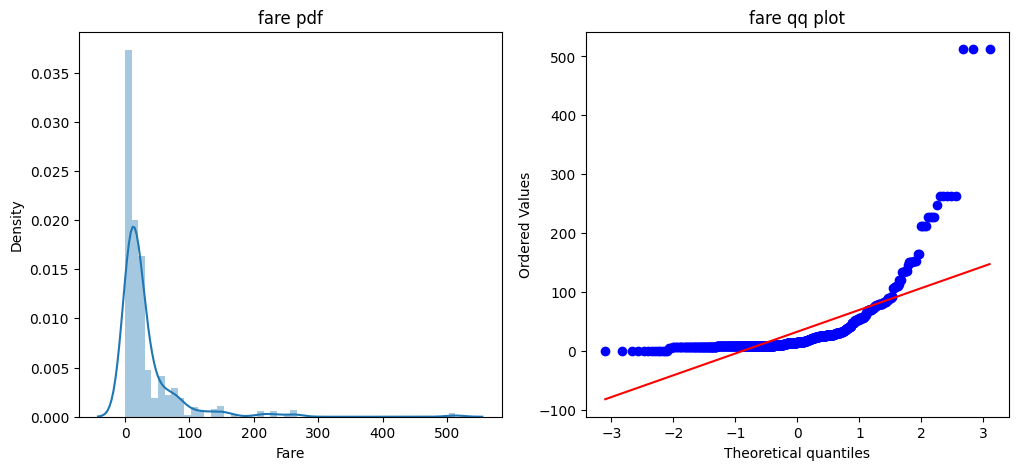

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('fare pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('fare qq plot')

In [11]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print('accuracy LR',accuracy_score(y_test,y_pred))
print('accuracy DC',accuracy_score(y_test,y_pred1))


accuracy LR 0.6480446927374302
accuracy DC 0.6871508379888268


In [13]:
trf=FunctionTransformer(func=np.log1p)

In [14]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [15]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

print('accuuracy LR',accuracy_score(y_test,y_pred))
print('accuracy Dc',accuracy_score(y_test,y_pred2))

accuuracy LR 0.6815642458100558
accuracy Dc 0.6703910614525139


In [16]:
x_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('Lr',np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print('dc',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

Lr 0.678027465667915
dc 0.6577528089887641


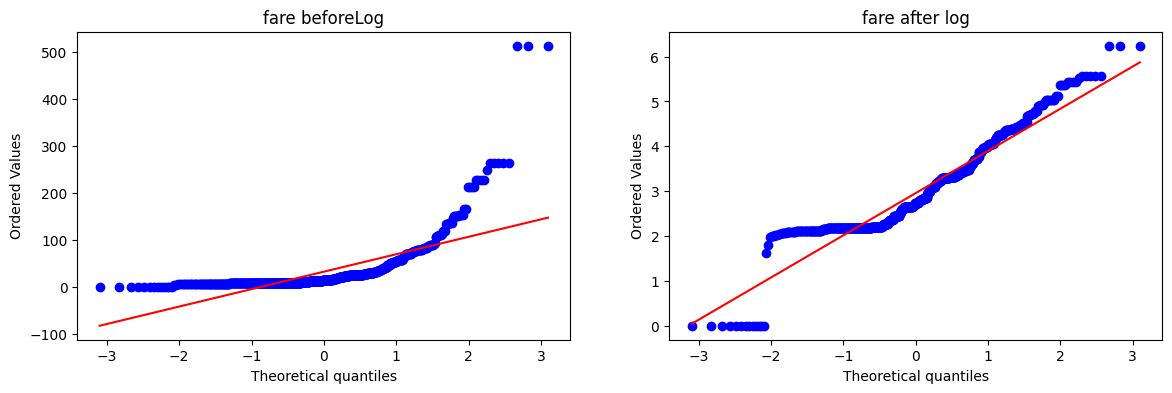

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('fare beforeLog')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('fare after log')
plt.show()


In [18]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.fit_transform(x_test)

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred=clf.predict(x_test_transformed2)
y_pred2=clf2.predict(x_test_transformed2)

print('accuracy Lr',accuracy_score(y_test,y_pred))
print('accuracy DC',accuracy_score(y_test,y_pred2))

accuracy Lr 0.6703910614525139
accuracy DC 0.6759776536312849


In [53]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans=trf.fit_transform(x)
    
    clf=LogisticRegression()
    
    print('accuracy',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('plot before transform')
    
    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('plot adter transform')
    
    plt.show()
    
    

In [60]:
apply_transform(lambda x:1/x+0.1)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1104, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 919, in check_array
    _assert_all_finite(
  File "C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').
